# Logistic Regression

We use logistic regression when we want to predict te two classes or two category of variables like (male/female or yes/no or 0/1).

Assumptions of Logistic rgression
- Meaningfull relationship between X & y variables
- There should not be any Multi collinearity between variables
- The independent variabls are linearly related to log odds

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
df = pd.read_csv('datasets/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [16]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [17]:
df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [18]:
df['marital'].value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

In [21]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [24]:
# First, let's see the data types of our columns
print("Data types of columns:")
print(df.dtypes)
print("\nNow let's group by job and calculate mean for numeric columns only:")
df.groupby('job').mean(numeric_only=True)

Data types of columns:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

Now let's group by job and calculate mean for numeric columns only:


,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.374063,1195.866567,15.340330,347.929535,2.376312,64.338831,0.973763
blue-collar,39.505144,1203.926440,15.235597,394.658951,2.541152,44.061214,0.633230
entrepreneur,42.887195,1621.942073,15.442073,370.182927,2.725610,32.746951,0.536585
housemaid,47.445255,1366.160584,16.364964,348.346715,2.689781,33.540146,0.503650
management,40.218239,1793.663679,15.792284,361.482073,2.588075,54.456352,0.925175
retired,65.424165,2417.250643,15.519280,389.993573,2.131105,53.003856,0.994859
self-employed,39.809877,1865.372840,15.938272,396.155556,2.533333,45.039506,0.804938
services,38.141928,1081.171181,15.728061,385.955580,2.576381,51.546046,0.684724
student,26.102778,1500.783333,15.175000,330.672222,2.169444,68.683333,1.297222


In [25]:
df.groupby('deposit').mean(numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.528350
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


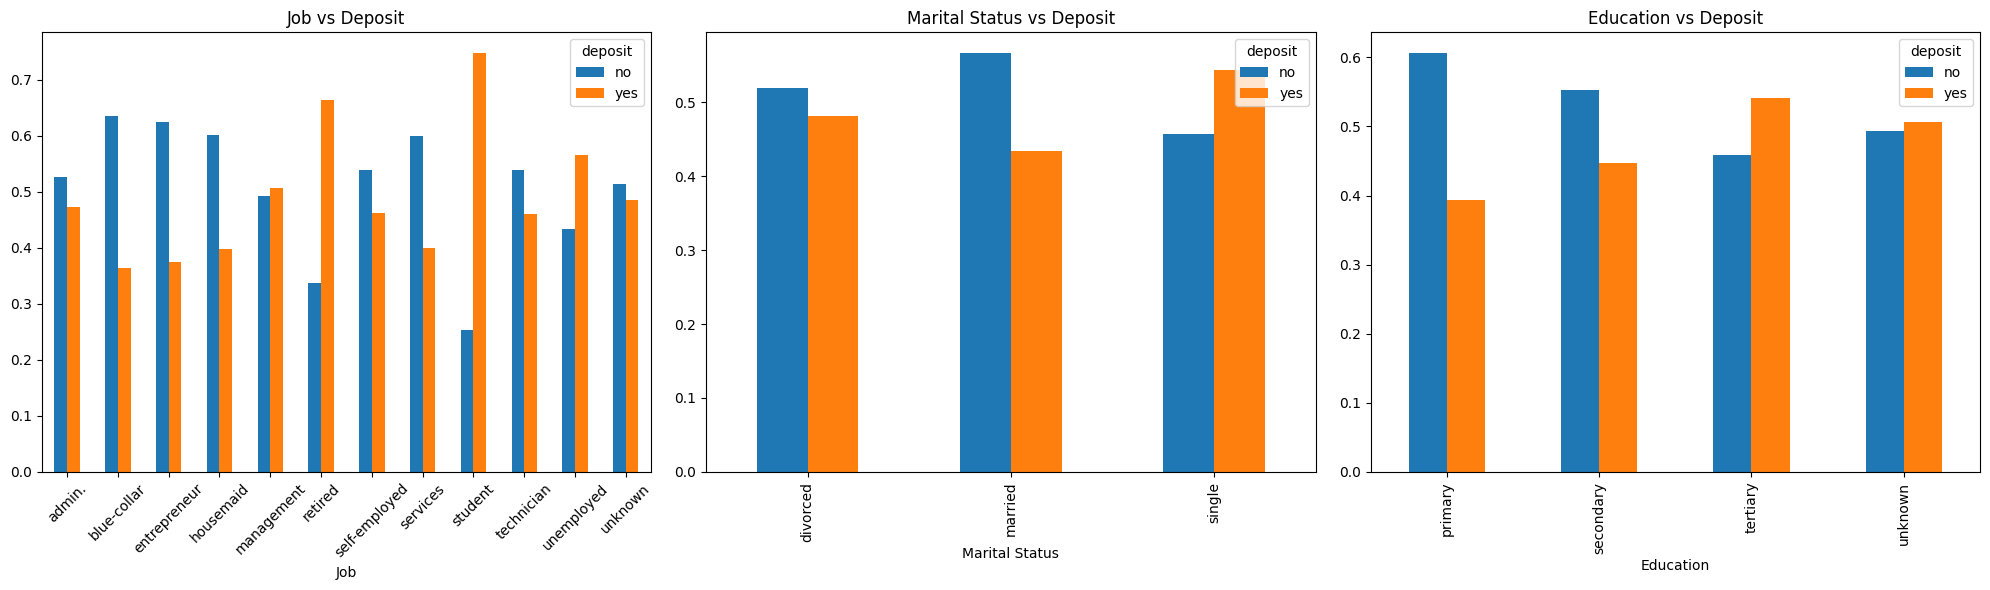

In [29]:
# Create a figure with 3 subplots in one row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot job vs deposit
pd.crosstab(df['job'], df['deposit'], normalize='index').plot(kind='bar', ax=ax1, title='Job vs Deposit')
ax1.set_xlabel('Job')
ax1.tick_params(axis='x', rotation=45)

# Plot marital status vs deposit
pd.crosstab(df['marital'], df['deposit'], normalize='index').plot(kind='bar', ax=ax2, title='Marital Status vs Deposit')
ax2.set_xlabel('Marital Status')

# Plot education vs deposit
pd.crosstab(df['education'], df['deposit'], normalize='index').plot(kind='bar', ax=ax3, title='Education vs Deposit')
ax3.set_xlabel('Education')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Age Distribution')

Text(0.5, 1.0, 'Age Distribution')

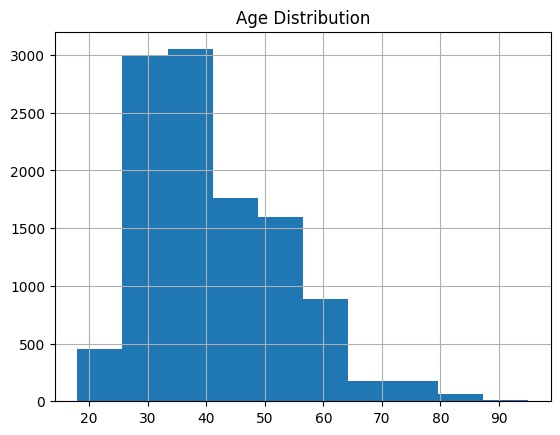

In [30]:
df['age'].hist()
plt.title('Age Distribution')

In [25]:
df_final = pd.get_dummies(df, drop_first=True)
df_final.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,1042,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
1,56,45,5,1467,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
2,41,1270,5,1389,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
3,55,2476,5,579,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
4,54,184,5,673,2,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True


In [26]:
df_final.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'deposit_yes'],
      dtype='object')

In [29]:
# If the data is imbalanced, we can use SMOTE to balance it
from imblearn.over_sampling import SMOTE    
X = df_final.drop('deposit_yes', axis=1)
y = df_final['deposit_yes']
print(f"Original dataset shape:{y.value_counts()} ")
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print(f"Resampled dataset shape:{y_res.value_counts()} ")

Original dataset shape:deposit_yes
False    5873
True     5289
Name: count, dtype: int64 
Resampled dataset shape:deposit_yes
True     5873
False    5873
Name: count, dtype: int64 


In [37]:
type(X_res)

pandas.core.frame.DataFrame

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)   
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9396, 42), (2350, 42), (9396,), (2350,))

In [34]:
# Model training
model = LogisticRegression(max_iter=100)
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

c:\Users\2000149664\OneDrive - Hexaware Technologies\Desktop\NVIDIA certification\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([ True, False, False, ...,  True,  True,  True], shape=(2350,))